<a href="https://colab.research.google.com/github/saikat0pramanik/OIBSIP/blob/main/Task_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Step 1- Data loading and Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the retail sales and menu datasets
retail_df = pd.read_csv('/content/retail_sales_dataset.csv')
menu_df = pd.read_csv('/content/menu.csv')

# Convert the 'Date' column to datetime objects
retail_df['Date'] = pd.to_datetime(retail_df['Date'])

# Check for missing values in both dataframes
print("Missing values in Retail Sales Data:")
print(retail_df.isnull().sum())

print("\nMissing values in Menu Data:")
print(menu_df.isnull().sum())

# Display data types and first few rows to confirm loading
print("\nRetail Sales Data Info:")
print(retail_df.info())

print("\nMenu Data Info:")
print(menu_df.info())

Missing values in Retail Sales Data:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Missing values in Menu Data:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Val

In [4]:
# Step 2- Descriptive statistics
# Retail Sales Descriptive Statistics
print("\nRetail Sales Numerical Stats:")
print(retail_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe())

print("\nRetail Sales Product Category Counts:")
print(retail_df['Product Category'].value_counts())

# Menu Data Descriptive Statistics for Calories
print("\nMenu Data Calories Stats:")
print(menu_df['Calories'].describe())

# Menu Data Item Counts by Category
print("\nMenu Item Counts by Category:")
print(menu_df['Category'].value_counts())


Retail Sales Numerical Stats:
              Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000

Retail Sales Product Category Counts:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Menu Data Calories Stats:
count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64

Menu Item Counts by Category:
Category
Coffee & Tea   

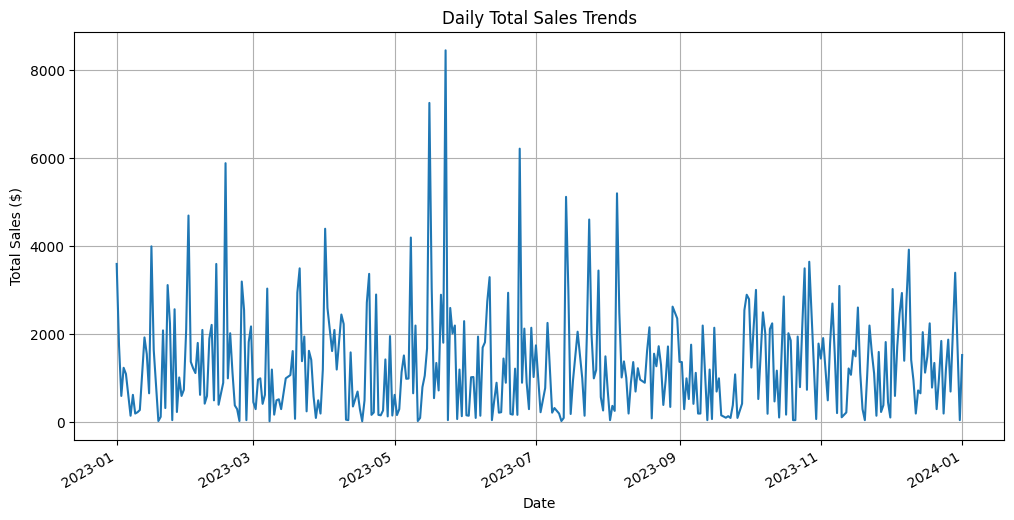

In [5]:
#step 3-Time series analysis
# Aggregate sales by date
daily_sales = retail_df.groupby('Date')['Total Amount'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Total Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

In [6]:
# step 4-Customer and product analysis
# Top 5 most popular product categories by quantity
top_products_qty = retail_df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Quantity Sold:")
print(top_products_qty)

# Total sales by gender
sales_by_gender = retail_df.groupby('Gender')['Total Amount'].sum()
print("\nTotal Sales by Gender:")
print(sales_by_gender)

# Average age per product category
avg_age_by_product = retail_df.groupby('Product Category')['Age'].mean()
print("\nAverage Customer Age by Product Category:")
print(avg_age_by_product)


Top 5 Products by Quantity Sold:
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

Total Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

Average Customer Age by Product Category:
Product Category
Beauty         40.371336
Clothing       41.948718
Electronics    41.736842
Name: Age, dtype: float64


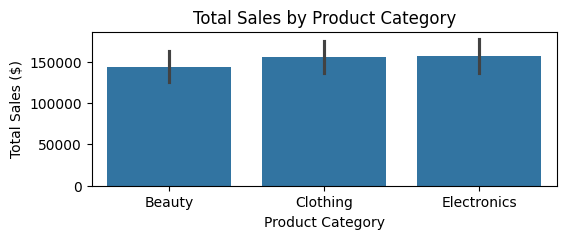

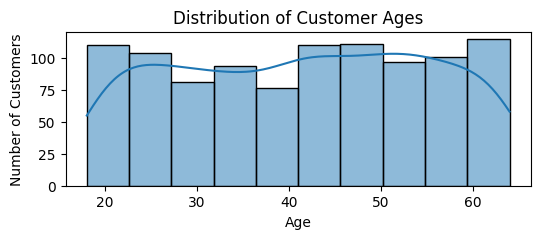

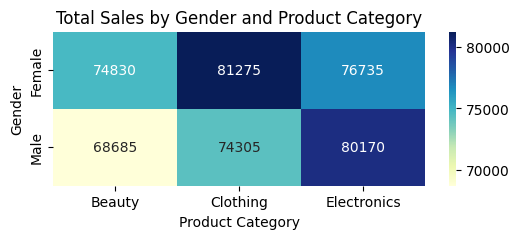

In [7]:
#Step 5- visualization
# Bar chart of Total Sales by Product Category
plt.figure(figsize=(6, 2))
sns.barplot(x='Product Category', y='Total Amount', data=retail_df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.show()

# Age distribution of customers
plt.figure(figsize=(6, 2))
sns.histplot(retail_df['Age'], bins=10, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Heatmap of Sales by Gender and Product Category
gender_product_sales = retail_df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
plt.figure(figsize=(6, 2))
sns.heatmap(gender_product_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Sales by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()

In [8]:
# step -6 Recommenadtion
# 1) If "Electronics" has the highest total sales, you could recommend a campaign to promote new electronic gadgets or accessories.

# 2)If a specific age group is underrepresented, you might suggest a targeted social media campaign to attract them.

# 3)If sales are consistently low in a particular month, you could propose a special discount event during that period.